# CDIPpy Example - Quality Control
The following example runs an application of the [CDIPpy](https://cdipsw.github.io/CDIPpy/quickstart/) python library to access non-public and public data for a CDIP station of interest.  Flags are set in the dataset which can be used to mask the dataset and show data that have passed quality control routines.  These flags include:
* WaveFlagPrimary
* WaveFlagSecondary

Steps:
1) read in CDIP station metadata,
2) access wave data for time period of interest,
3) plot timeseries,

## Import Libraries

Start by importing the necessary python packages and CDIPPY module

In [1]:
import netCDF4
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import time
import calendar

# CDIP imports
import cdippy
from cdippy.stndata import StnData

FileNotFoundError: [Errno 2] No such file or directory: 'pyproject.toml'

## Initialize CDIPpy input parameters
The Astoria Canyon Buoy, OR - 179, went offsite in Nov 2024.  Let's explore the dataset with CDIPpy.

* Supply CDIP station id
* Start date (YYYYMMDDHH)
* End date
* Station parameters

In [3]:
##- Initialize station id, start/end date, and parameters
stn = '179'
sdate = '20241101'
edate = '20241201'
params = ['waveHs','waveTp','waveDp']

## Data Access

* Use cdippy.stndata function StnData(stn)
* Returns StnData object
* Access station metadata about individual stations deployments

In [4]:
##- Get Station Dataset object
stn_data = StnData(stn)

##- Get metadata (i.e. information about individual deployments)
meta = stn_data.get_stn_meta()
stn_name = meta['metaStationName']
print(stn_name)

NameError: name 'StnData' is not defined

### Grab data using 'get_series' function
Will return a dictionary of arrays for each parameter as keys

Default usage:
stn_data.get_series(start, end, params)
* start: start datetime (datetime obj)
* end: end datetime (datetime obj)
* params: list of parameters


Return non-public usage: get_series(
        start: datetime = None,
        end: datetime = None,
        vrs: list = None,
        pub_set: str = None,
        apply_mask: bool = None
    )


In [ ]:
##- Use CDIPPY to convert input start/end date strings to datetime objects
start = cdippy.utils.utils.cdip_datetime(sdate)
end = cdippy.utils.utils.cdip_datetime(edate)

##- Grab default data using 'get_series' function, will mask out all non-public data
data = stn_data.get_series(start, end, params)
##- Grab default data using 'get_series' function, will mask out all non-public data
data_nonpub = stn_data.get_series(start, end, params,'all',False)
data_nonpub.keys()

## Convert waveTimes to Datetime object

In [6]:
## Convert wave times to datetime objects (currently integers)
##- Convert times to datetime objects
wT = [cdippy.utils.timestamp_to_datetime(x) for x in data['waveTime']]

## Create a Pandas Dataframe indexed by time

In [7]:
## Create pandas dataframe from data
df = pd.DataFrame({'datetime': wT, 'Hs': data['waveHs'].data})
df.set_index('datetime', inplace=True)
# Add a "Month" column for grouping
df['Month'] = df.index.month
df.head()

,Hs,Month
datetime,,
2024-11-01 00:00:00,4.49,11
2024-11-01 00:30:00,4.53,11
2024-11-01 01:00:00,4.58,11
2024-11-01 01:30:00,4.41,11
2024-11-01 02:00:00,4.70,11


## Apply mask to dataset to filter out non-public data
good_waves = ( nc.variables['waveFlagPrimary'][:] == 1 )
hs = data_nonpub['waveHs'][:]
hs.mask = ~good_waves

## Create Compendium plot

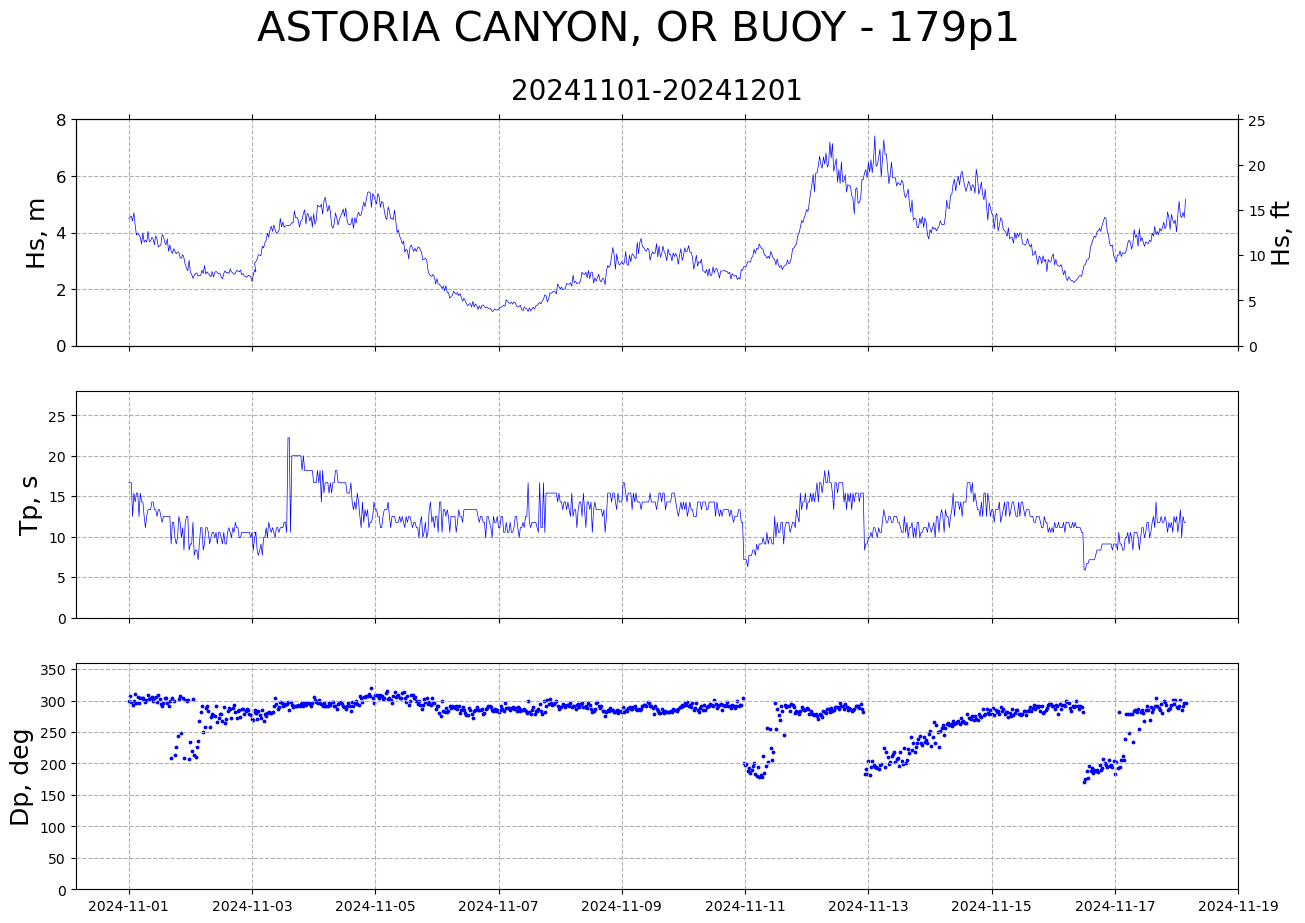

In [8]:
# Crete figure and specify subplot orientation (3 rows, 1 column), shared x-axis, and figure size
f, (pHs, pTp, pDp) = plt.subplots(3, 1, sharex=True, figsize=(15,10)) 

# Create 3 stacked subplots for three PARAMETERS (Hs, Tp, Dp)
pHs.plot(wT,data['waveHs'],'b', linewidth="0.5")
pTp.plot(wT,data['waveTp'],'b', linewidth="0.5")
pDp.scatter(wT,data['waveDp'],color='blue',s=3) # Plot Dp variable as a scatterplot, rather than line

# Set Titles
plt.suptitle(stn_name, fontsize=30, y=0.99)
plt.title(start.strftime("%Y%m%d")+'-'+end.strftime("%Y%m%d"), fontsize=20, y=3.45)

# Set tick parameters
#pHs.set_xticklabels(['1','6','11','16','21','26','31']) 
pHs.tick_params(axis='y', which='major', labelsize=12, right='off')
pHs.tick_params(axis='x', which='major', labelsize=12, top='off')

# Make a second y-axis for the Hs plot, to show values in both meters and feet
pHs2 = pHs.twinx()

# Set y-axis limits for each plot
pHs.set_ylim(0,8)
pHs2.set_ylim(0,25)
pTp.set_ylim(0,28)
pDp.set_ylim(0,360)

# Label each y-axis
pHs.set_ylabel('Hs, m', fontsize=18)
pHs2.set_ylabel('Hs, ft', fontsize=18)
pTp.set_ylabel('Tp, s', fontsize=18)
pDp.set_ylabel('Dp, deg', fontsize=18)

# Plot dashed gridlines
pHs.grid(linestyle='--')
pTp.grid(linestyle='--')
pDp.grid(linestyle='--')
